In [1]:
# default_exp adversarial_thompson_sampler

# adversarial_thompson_sampler
> Trying to Thompson Sample against each other

The idea is simple: use Thompson Samplers both as agent for making the decision and also as the adversarial agent that provides the context.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

np.random.seed(42)
%matplotlib inline

matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
plt.style.use(matplotlib_style)

from sklearn.utils import shuffle
import random
from fastprogress.fastprogress import master_bar, progress_bar

plt.rcParams['figure.figsize'] = 16,5

%load_ext autoreload
%autoreload 2

In [3]:
from thompson_sampling.helpers import plot_regret, showcase_code
from thompson_sampling.multi_armed_bandits import contextual_categorical_bandit, contextual_categorical_get_optimal_arm
from thompson_sampling.solvers import BetaBandit, LogisticThompsonSampler
from thompson_sampling.models import OnlineLogisticRegression


In [4]:
noise = 0.1

presentation = True

In [5]:
X_orig = np.linspace(-3,3,500)
X = shuffle(X_orig)

idx = np.argsort(X)

In [6]:

lts1 = LogisticThompsonSampler(OnlineLogisticRegression, num_arms=2, num_context = 2)
lts2 = LogisticThompsonSampler(OnlineLogisticRegression, num_arms=2, num_context = 2)

arm2 = lts1.choose_arm(np.append([-10],[1]))
arm1 = lts2.choose_arm(np.append([10],[1]))

arm1_list = []
arm2_list = []
for context in X:
    

    # context: arm2, arm1
    # arm: arm1_new, arm2_new
    # reward: arm2_new, arm1_new
    
    context1 = np.append(context, arm2)
    context2 = np.append(context, arm1)
    
    
    
    arm1_new = lts1.choose_arm(context1)
    arm2_new = lts2.choose_arm(context2)
    
    
    lts1.update(arm1_new, context1, arm2_new)
    lts2.update(arm2_new, context2, arm1_new)
    
    arm1 = arm1_new
    arm2 = arm2_new 
    
    
    arm1_list.append(arm1)
    arm2_list.append(arm2)
    

In [7]:
np.append([1],[0])

array([1, 0])

In [8]:
context1

array([-1.77354709,  0.        ])

In [9]:
np.mean(arm1_list)

0.442

In [10]:
np.mean(arm2_list)

0.468

In [11]:
lts1.choose_arm(context1)

0

In [12]:
lts1.choose_arm(context1)

0

In [13]:
lts1.choose_arm(context1)

0

In [14]:
lts1.choose_arm(context1)

0

In [15]:
lts1.choose_arm(context1)


0

# Shared reward

In [16]:
theta = -0.5, 0.5
theta2= 0.1,0.9

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [18]:
reward_75_percent = 0.1 * np.max(X)

def cooperative_MAB(arm1,arm2,context):
    
    if arm1 == arm2:
        return sigmoid(reward_75_percent)
    
    return sigmoid(context * arm1 *-.5 + context *arm2*.5)

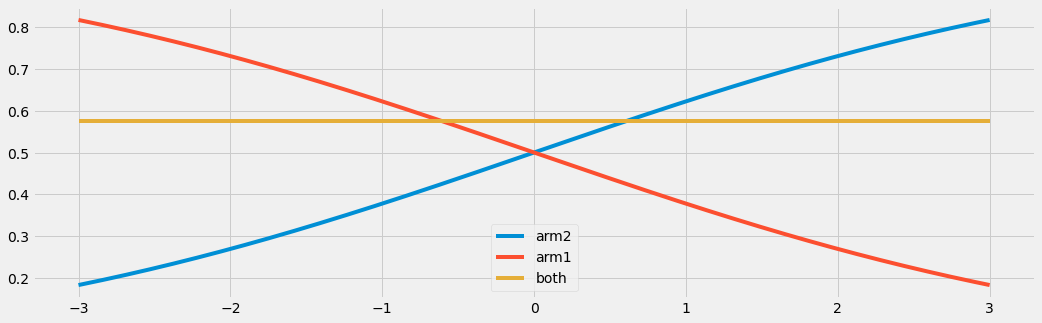

In [19]:
plt.plot(X_orig,[cooperative_MAB(0,1,x) for x in X_orig],label='arm2')
plt.plot(X_orig,[cooperative_MAB(1,0,x) for x in X_orig],label='arm1')
plt.plot(X_orig,[cooperative_MAB(0,0,x) for x in X_orig],label='both')

plt.legend()




[1.87182543 2.07369732]
[-1.4608786   2.16274924]
[-1.66922868  2.11218993]
[1.6895466  1.92506163]


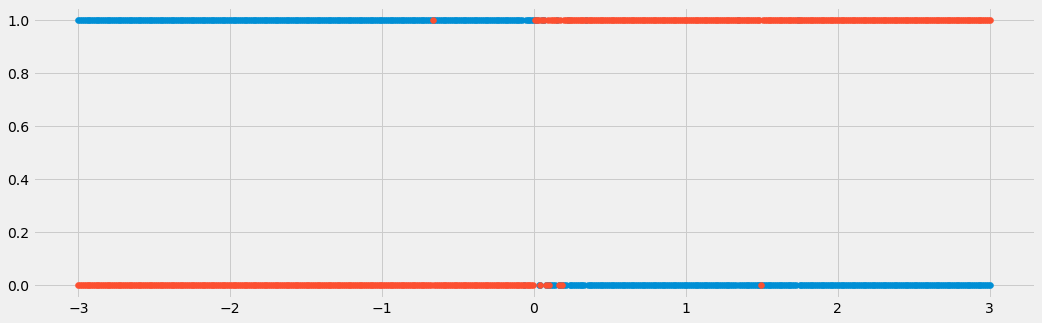

In [33]:

lts1 = LogisticThompsonSampler(OnlineLogisticRegression, num_arms=2, num_context = 2)
lts2 = LogisticThompsonSampler(OnlineLogisticRegression, num_arms=2, num_context = 2)

arm2 = lts1.choose_arm(np.append([-10],[1]))
arm1 = lts2.choose_arm(np.append([10],[1]))

arm1_list = []
arm2_list = []
for context in X:
    

    # context: arm2, arm1
    # arm: arm1_new, arm2_new
    # reward: arm2_new, arm1_new
    
    context1 = np.append(context, arm2)
    context2 = np.append(context, arm1)
    
    
    
    arm1_new = lts1.choose_arm(context1)
    arm2_new = lts2.choose_arm(context2)
    
    reward = cooperative_MAB(arm1_new,arm2_new,context)
    
    lts1.update(arm1_new, context1, reward)
    lts2.update(arm2_new, context2, reward)
    
    arm1 = arm1_new
    arm2 = arm2_new 
    
    
    arm1_list.append(arm1)
    arm2_list.append(arm2)
    
    
plt.scatter(X[idx], np.array(arm1_list)[idx])
plt.scatter(X[idx], np.array(arm2_list)[idx])



print(lts1.model_list[0].w)
print(lts1.model_list[1].w)
print(lts2.model_list[0].w)
print(lts2.model_list[1].w)

In [21]:

arm2

0

# ???

[-1.42040791  2.34679227]
[1.86639571 2.32135308]
[-2.06184633  2.04067757]
[2.25704799 1.74583894]


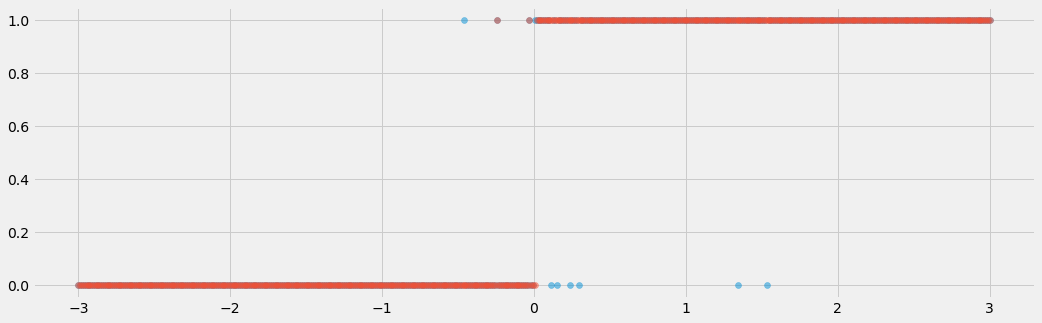

In [22]:

lts1 = LogisticThompsonSampler(OnlineLogisticRegression, num_arms=2, num_context = 2)
lts2 = LogisticThompsonSampler(OnlineLogisticRegression, num_arms=2, num_context = 2)

arm2 = lts1.choose_arm(np.append([-10],[1]))
arm1 = lts2.choose_arm(np.append([10],[1]))

arm1_list = []
arm2_list = []
for i in range(len(X)):
    
    context = X[i]
    

    # context: arm2, arm1
    # arm: arm1_new, arm2_new
    # reward: arm2_new, arm1_new
    
    context1 = np.append(context, arm2)
    context2 = np.append(context, arm1)
    
    
    
    arm1_new = lts1.choose_arm(context1)
    arm2_new = lts2.choose_arm(context2)
    
    reward = cooperative_MAB(arm1_new,arm2_new,context)
    
    lts1.update(arm1_new, context1, reward)
    lts2.update(arm2_new, context2, reward)
    
    arm1 = arm1_new
    arm2 = arm2_new 
    
    
    arm1_list.append(arm1)
    arm2_list.append(arm2)
    
    
    

plt.scatter(X[idx], np.array(arm1_list)[idx],alpha=0.5)
plt.scatter(X[idx], np.array(arm2_list)[idx],alpha=0.5)



print(lts1.model_list[0].w)
print(lts1.model_list[1].w)
print(lts2.model_list[0].w)
print(lts2.model_list[1].w)

In [23]:
i

499

In [24]:
lts1.model_list[0].w

array([-1.42040791,  2.34679227])

In [25]:
lts1.model_list[1].w

array([1.86639571, 2.32135308])

In [26]:
context1

array([-1.77354709,  1.        ])

In [27]:
lts2.model_list[0].w

array([-2.06184633,  2.04067757])

In [28]:
lts2.model_list[1].w

array([2.25704799, 1.74583894])